<a href="https://colab.research.google.com/github/CHU1226/Pandas/blob/main/%E5%95%86%E6%83%85%E9%A0%90%E6%B8%AC_%E6%9C%9F%E4%B8%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#人工智慧的商情預測，期中考:

學號：110AB0007

姓名：林千惠

上傳：把開放共用後的網址，上傳到Zuvio

---
#1.練習1：請讀入以下的csv檔案，用多項式預測，比較【4種的多項式預測線】？
#其中，第4種多項式預測線，必須最接近原始數據

資料集檔案：https://acupun.site/lecture/predict/example/resource/curve-3.csv

In [ ]:
import pandas as pd
df = pd.read_csv("https://acupun.site/lecture/predict/example/resource/curve-3.csv")
df

,x,y
0,0.000000,-0.298148
1,0.001001,-0.290418
2,0.002002,-0.275903
3,0.003003,-0.313167
4,0.004004,-0.315493
...,...,...
995,0.995996,0.275279
996,0.996997,0.309969
997,0.997998,0.362625
998,0.998999,0.323311


In [ ]:
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
model10_1 = PolynomialFeatures(degree=10)
x_poly = model10_1.fit_transform(df[['x']])
model10_2 = lm.LinearRegression()
model10_2.fit(x_poly,df['y'])

LinearRegression()

In [ ]:
model15_1 = PolynomialFeatures(degree=15)
x_poly2 = model15_1.fit_transform(df[['x']])
model15_2 = lm.LinearRegression()
model15_2.fit(x_poly2,df['y'])

LinearRegression()

In [ ]:
model20_1 = PolynomialFeatures(degree=20)
x_poly3 = model20_1.fit_transform(df[['x']])
model20_2 = lm.LinearRegression()
model20_2.fit(x_poly3,df['y'])

LinearRegression()

In [ ]:
model100_1 = PolynomialFeatures(degree=100)
x_poly4 = model100_1.fit_transform(df[['x']])
model100_2 = lm.LinearRegression()
model100_2.fit(x_poly4,df['y'])

LinearRegression()

In [ ]:
#--------------------------------
# colab繪圖顯示繁體中文
#--------------------------------
import matplotlib
# 先下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download import matplotlib
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

/bin/bash: line 1: import: command not found
--2023-11-17 07:35:20--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.122.102, 172.253.122.139, 172.253.122.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.122.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jehmtq4r0v53bee62r9qrlo658mql1r0/1700206500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f3fa55ac-7d1b-4d47-bcd1-a5a3add3f529 [following]
--2023-11-17 07:35:21--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jehmtq4r0v53bee62r9qrlo658mql1r0/1700206500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=f3fa55ac-7d1b-4d47-bcd1-a5a3add3f529
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.16

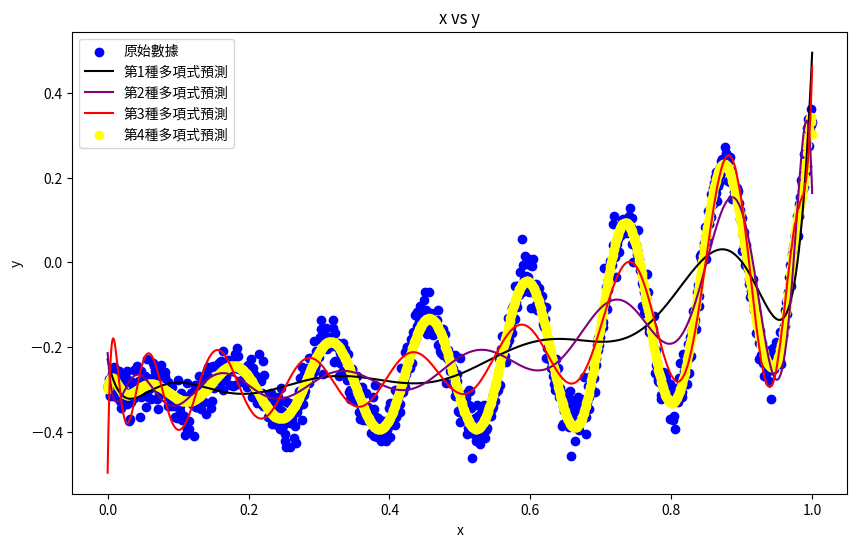

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['x'],df['y'],label='原始數據',color='blue')
plt.plot(df['x'],model10_2.predict(x_poly),label='第1種多項式預測',color='black')
plt.plot(df['x'],model15_2.predict(x_poly2),label='第2種多項式預測',color='purple')
plt.plot(df['x'],model20_2.predict(x_poly3),label='第3種多項式預測',color='red')
plt.scatter(df['x'],model100_2.predict(x_poly4),label='第4種多項式預測',color='yellow')
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.legend()
plt.show()

---
##2.練習2：請用深度學習（多顆類神經網絡）來學習以下的csv檔案，並畫出『非線性迴歸線』
#請預測當x=1，y=？

資料集檔案：https://acupun.site/lecture/predict/example/resource/curve-3.csv

In [ ]:
df2 = pd.read_csv("https://acupun.site/lecture/predict/example/resource/curve-3.csv")
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=50,input_dim=1, activation='relu'),
    tf.keras.layers.Dense(units=80, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=tf.keras.metrics.MeanSquaredError()
)

In [ ]:
model.fit(df2[['x']], df2['y'], epochs=2000)

Epoch 1/2000
32/32 [==============================] - 1s 2ms/step - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 2/2000
32/32 [==============================] - 0s 3ms/step - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 3/2000
32/32 [==============================] - 0s 3ms/step - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 4/2000
32/32 [==============================] - 0s 2ms/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 5/2000
32/32 [==============================] - 0s 3ms/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 6/2000
32/32 [==============================] - 0s 3ms/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 7/2000
32/32 [==============================] - 0s 2ms/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 8/2000
32/32 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 9/2000
32/32 [==============================] - 0s 2ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 10/2

In [ ]:
model.predict([[1]])

1/1 [==============================] - 0s 88ms/step


array([[0.32641444]], dtype=float32)

32/32 [==============================] - 0s 2ms/step


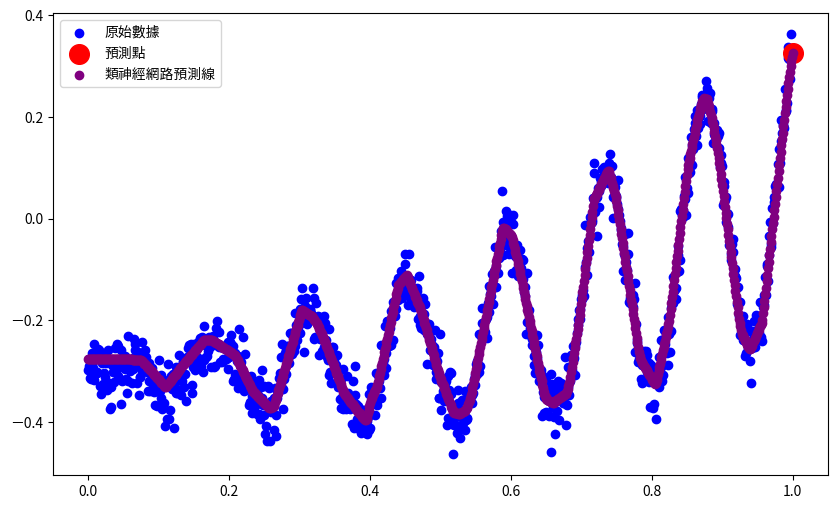

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df2['x'],df2['y'],color='blue',label='原始數據')
plt.scatter([[1]],model.predict([[1]]),color='red',label='預測點',s=200)
plt.scatter(df2['x'],model.predict(df2[['x']]),color='purple',label='類神經網路預測線')
plt.legend()
plt.show()

---
#3.練習3：用sklearn模組，建立『KNN』演算法來預測鐵達尼號乘客是否會存活？

#(1)預測【乘客等級,年齡,性別】 = 【1st, 30, female】是否生存？

#(2)預測【乘客等級,年齡,性別】 = 【3rd, 31, male】是否生存？

#(3)預測【乘客等級,年齡,性別】 = 【2nd, 27, male】是否生存？

#**注意：請回答【會生存，不會生存】，不要回答0/1**
---
#資料集檔案：
https://acupun.site/lecture/predict/example/resource/titanic_pre-chi.xlsx

#資料表：data

---
#特徵欄位：乘客等級，年齡，性別

#標籤label欄位：是否生存
0：亡

1：生存



In [ ]:
df3 = pd.read_excel("https://acupun.site/lecture/predict/example/resource/titanic_pre-chi.xlsx","data")
df4 = df3.replace("1st",1).replace("2nd",2).replace("3rd",3).replace("male",1).replace("female",0)
df4

,乘客編號,姓名,乘客等級,年齡,性別,是否生存
0,1,"Allen, Miss Elisabeth Walton",1,29.00,0,1
1,2,"Allison, Miss Helen Loraine",1,2.00,0,0
2,3,"Allison, Mr Hudson Joshua Creighton",1,30.00,1,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.00,0,0
4,5,"Allison, Master Hudson Trevor",1,0.92,1,1
...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3,27.00,1,0
1309,1310,"Zakarian, Mr Maprieder",3,26.00,1,0
1310,1311,"Zenni, Mr Philip",3,22.00,1,0
1311,1312,"Lievens, Mr Rene",3,24.00,1,0


In [ ]:
import sklearn.neighbors as nb
model = nb.KNeighborsClassifier(n_neighbors=5)
model.fit(df4[["乘客等級","年齡","性別"]],df4[["是否生存"]])

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
#(1)預測【乘客等級,年齡,性別】 = 【1st, 30, female】是否生存？
model.predict([[1, 30, 0]])[0]
if model.predict([[1, 30, 0]])[0] == 0:
  print("亡")
elif model.predict([[1, 30, 0]])[0] == 1:
  print("生存")

生存


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#(2)預測【乘客等級,年齡,性別】 = 【3rd, 31, male】是否生存？
model.predict([[3, 31, 1]])[0]
if model.predict([[3, 31, 1]])[0] == 0:
  print("亡")
elif model.predict([[3, 31, 1]])[0] == 1:
  print("生存")

亡


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#(3)預測【乘客等級,年齡,性別】 = 【2nd, 27, male】是否生存？
model.predict([[2, 27, 1]])[0]
if model.predict([[2, 27, 1]])[0] == 0:
  print("亡")
elif model.predict([[2, 27, 1]])[0] == 1:
  print("生存")

亡


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


---
#5.練習5：讀入『A商城會員資料集』，請做自動分群，將之分成5種會員屬性，請分出來？並作預測
#案例資料集選自Kaggle：商城使用者細分數據(Mall Customer Segmentation Data)
基於某一家商城會員的基本資料，由各種特徵欄位，來進行客戶細分，以便可以給行銷團隊進一步制定決策提供依

#將商城會員分為如下聚類/分群：
•	謹慎消費者（高收入且低消費的客戶）

•	標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）

•	目標消費者（高收入且高消費的客戶）

•	非理性消費者（收入少且高消費的客戶）

•	理性消費者（低收入且低消費的客戶）

---
#這是一個關於商場顧客的資料集，它包含了 200 個顧客的 4 個特徵，
#特徵欄位分別是【性別、年齡、年收入，消費得分】。

消費得分是根據顧客的消費行為和購買力給出的一個數值，越高表示越有可能成為忠實的顧客。

我們可以用這個資料集來做聚類分析，看看能否將顧客分成不同的市場區隔，並根據他們的特徵和消費得分來制定相應的行銷策略。

---
#已知下方的特徵欄位，對應的客戶分群標籤：
•	【Male, 32, 137, 18】：謹慎消費者（高收入且低消費的客戶）

•	【Female, 29, 40, 42】：標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）

•	【Male, 30, 137, 83】：目標消費者（高收入且高消費的客戶）

•	【Male, 21, 15, 81】：非理性消費者（收入少且高消費的客戶）

•	【Female, 20, 16, 6】： 理性消費者（低收入且低消費的客戶）

---

#請自行由此來驗證並判別你的自動分群的編號所對應之品種

---
#數據集檔案：
https://acupun.site/lecture/predict/example/resource/Mall_Customers_chi.csv


In [ ]:
#☎範例示範（本題不要做，只是給你看如何回答）：請做預測:D客戶的特徵值【性別，年齡，年收入，消費得分】
#=【Female,42,34,17】，請問D客戶的屬性歸類？


他是：理性消費者（低收入且低消費的客戶


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
df5 = pd.read_csv("https://acupun.site/lecture/predict/example/resource/Mall_Customers_chi.csv")
df6 = df5.replace("Male",1).replace("Female",0)
df6

,客戶ID,性別,年齡,年收入,消費得分
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
import sklearn.cluster as cluster
model = cluster.KMeans(n_clusters=5,random_state=25)
model.fit(df6[["性別","年齡","年收入","消費得分"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=25)

In [ ]:
#☎(1).請做預測1:A客戶的特徵值【性別，年齡，年收入，消費得分】
#=【Male, 59, 43, 60】，請問A客戶的屬性歸類？
model.predict([[1, 59, 43, 60]])[0]
if model.predict([[1, 59, 43, 60]])[0] == 0:
  print("他是:目標消費者（高收入且高消費的客戶）")
elif model.predict([[1, 59, 43, 60]])[0] == 1:
  print("他是:標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）")
elif model.predict([[1, 59, 43, 60]])[0] == 2:
  print("他是:謹慎消費者（高收入且低消費的客戶）")
elif model.predict([[1, 59, 43, 60]])[0] == 3:
  print("他是:理性消費者（低收入且低消費的客戶）")
elif model.predict([[1, 59, 43, 60]])[0] == 4:
  print("他是:非理性消費者（收入少且高消費的客戶）")

他是:標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
#☎(2).請做預測2:B客戶的特徵值【性別，年齡，年收入，消費得分】
#=【Female,34,103,23】，請問B客戶的屬性歸類？
model.predict([[0,34,103,23]])[0]
if model.predict([[0,34,103,23]])[0] == 0:
  print("她是:目標消費者（高收入且高消費的客戶）")
elif model.predict([[0,34,103,23]])[0] == 1:
  print("她是:標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）")
elif model.predict([[0,34,103,23]])[0] == 2:
  print("她是:謹慎消費者（高收入且低消費的客戶）")
elif model.predict([[0,34,103,23]])[0] == 3:
  print("她是:理性消費者（低收入且低消費的客戶）")
elif model.predict([[0,34,103,23]])[0] == 4:
  print("她是:非理性消費者（收入少且高消費的客戶）")

她是:謹慎消費者（高收入且低消費的客戶）


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
#☎(3).請做預測3:C客戶的特徵值【性別，年齡，年收入，消費得分】
#=【Male, 30, 99, 97】，請問C客戶的屬性歸類？
model.predict([[1, 30, 99, 97]])[0]
if model.predict([[1, 30, 99, 97]])[0] == 0:
  print("他是:目標消費者（高收入且高消費的客戶）")
elif model.predict([[1, 30, 99, 97]])[0] == 1:
  print("他是:標準消費者（與其他客戶相比，擁有平均收入和平均消費的客戶）")
elif model.predict([[1, 30, 99, 97]])[0] == 2:
  print("他是:謹慎消費者（高收入且低消費的客戶）")
elif model.predict([[1, 30, 99, 97]])[0] == 3:
  print("他是:理性消費者（低收入且低消費的客戶）")
elif model.predict([[1, 30, 99, 97]])[0] == 4:
  print("他是:非理性消費者（收入少且高消費的客戶）")

他是:目標消費者（高收入且高消費的客戶）


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
model.predict([[1, 32, 137, 18]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


2

In [ ]:
model.predict([[0, 29, 40, 42]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


1

In [ ]:
model.predict([[1, 30, 137, 83]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


0

In [ ]:
model.predict([[1, 21, 15, 81]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


4

In [ ]:
model.predict([[0, 20, 16, 6]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


3